<a href="https://colab.research.google.com/github/thebishorup/stock-prediction/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install quandl

In [0]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

import quandl

In [0]:
dates = []
adj_price = []

In [0]:
def get_data():
  df = quandl.get('WIKI/TSLA')
  #print(df.head())

  # reset index to get dates
  df = df.reset_index()

  # load and adj close into arrays
  for row in df['Adj. Close']:
    adj_price.append(row)


  # Get day of the month into array from Date row
  for row in df['Date']:
    dates.append(int(row.strftime('%d')))
    
  return

In [0]:
def get_csv_data(filename):
  with open(filename, 'r') as csv_file:
    csv_file_reader = csv.reader(csv_file)
    next(csv_file_reader)
    
    for row in csv_file_reader:
      dates.append(int(row[0].split('-')[0]))
      adj_price.append(float(row[1]))
  return

In [0]:
def show_plot(dates, prices):
  lr = LinearRegression()
  # reshape
  dates = np.reshape(dates, (len(dates), 1))
  prices = np.reshape(prices, (len(prices), 1))
  
  #trai the model
  lr.fit(dates, prices)
  plt.scatter(dates, prices, color = 'yellow')
  plt.plot(dates, lr.predict(dates), color = 'blue', linewidth = 3)
  plt.show()
  
  return

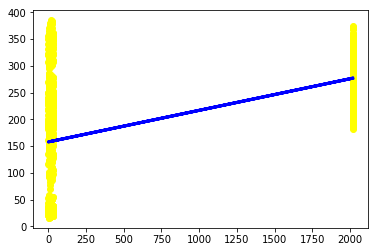

In [22]:
get_csv_data('TSLA.csv')

show_plot(dates, adj_price)

In [0]:
def predict_price_linear_regression(dates, prices, x):
  lr = LinearRegression()
  
  # reshape
  dates = np.reshape(dates, (len(dates), 1))
  prices = np.reshape(prices, (len(prices), 1))
  
  #trai the model
  lr.fit(dates, prices)
  
  predicted_price = lr.predict(x)
  
  # Create a plot
  plt.scatter(dates, prices, color = 'black', label = 'Data')
  plt.plot(dates, lr.predict(dates), color = 'red', label = 'Linear Model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Linear Regression')
  plt.legend()
  plt.show()
  
  return predicted_price[0][0], lr.coef_[0][0], lr.intercept_[0 ]

In [0]:
def predict_price_svr_regression(dates, prices, x):
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  # reshape
  dates = np.reshape(dates, (len(dates), 1))
  prices = np.reshape(prices, (len(prices), 1))
  
  #trai the model
  svr_rbf.fit(dates, prices)
  
  svr_predicted_price = svr_rbf.predict(x)
  
  # Create a plot
  plt.scatter(dates, prices, color = 'black', label = 'Data') # init data point
  plt.plot(dates, svr_rbf.predict(dates), color = 'red', label = 'RBF Model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()
  
  return svr_predicted_price[0]

In [0]:
def predict_price_poly_regression(dates, prices, x):
  # Quadratic Regression 2
  poly2 = make_pipeline(PolynomialFeatures(2), Ridge())
  
  # reshape
  dates = np.reshape(dates, (len(dates), 1))
  prices = np.reshape(prices, (len(prices), 1))
  
  #Train the model
  poly2.fit(dates, prices)
  
  #Predict
  poly2_prediction = poly2.predict(x)
  
  #Plot
  plt.scatter(dates, prices, color = 'black', label = 'Data')
  plt.plot(dates, poly2.predict(dates), color = 'red', label = 'Poly 2 Model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Polynomial Regression 2')
  plt.legend()
  plt.show()
  
  return poly2_prediction[0][0]

In [0]:
def predict_price_knn_regression(dates, prices, x):
  # KNN Regressor
  knn = KNeighborsRegressor(n_neighbors = 2)
  
  # reshape
  dates = np.reshape(dates, (len(dates), 1))
  prices = np.reshape(prices, (len(prices), 1))
  
  #Train the model
  knn.fit(dates, prices)
  
  #Predict
  knn_prediction = knn.predict(x)
  
  #plot
  plt.scatter(dates, prices, color = 'black', label = 'Data')
  plt.plot(dates, knn.predict(dates), color = 'red', label = 'KNN Model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Polynomial Regression 2')
  plt.legend()
  plt.show()
  
  return knn_prediction[0][0]

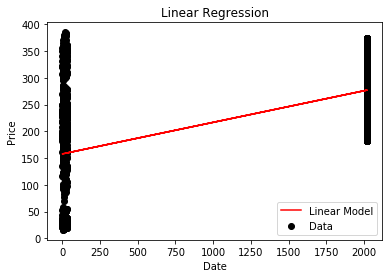

Predicted Price LR: 159.4289768141556
COEF LR: 0.058981526042181785
COST LR: 157.71851255893233


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


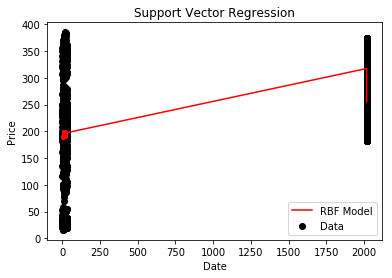

Predicted Price SVR: 194.28126965300984


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.76426e-17): result may not be accurate.
  overwrite_a=True).T


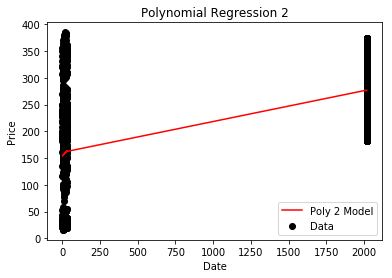

Predicted Price Poly 2: 162.7849724555775


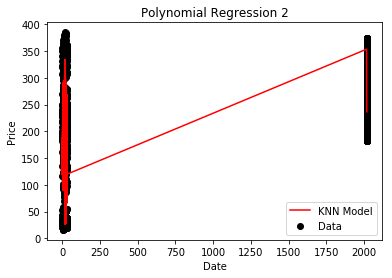

Predicted Price KNN: 267.99


In [71]:
# Get data
get_csv_data('TSLA.csv')

# Linear Regression
lr_predicted_price, lr_coef, lr_const = predict_price_linear_regression(dates, adj_price, [[29]])
print(f'Predicted Price LR: {lr_predicted_price}')
print(f'COEF LR: {lr_coef}')
print(f'COST LR: {lr_const}')

# SVR Regression
svr_predicted_price = predict_price_svr_regression(dates, adj_price, [[29]])
print(f'Predicted Price SVR: {svr_predicted_price}')

# Polynomial Regression
poly2_predicted_price = predict_price_poly_regression(dates, adj_price, [[29]])
print(f'Predicted Price Poly 2: {poly2_predicted_price}')

# KNN Regression
knn_predicted_price = predict_price_knn_regression(dates, adj_price, [[29]])
print(f'Predicted Price KNN: {knn_predicted_price}')